In [1]:
from dataset import *
from model import *
import torch
import numpy as np

In [2]:
# Hyperparameters.
seed = 0
batch_size = 1
num_slots = 7
num_iterations = 3
resolution = (128, 128)

In [3]:
resolution = (128, 128)
model = SlotAttentionAutoEncoder(resolution, num_slots, num_iterations, 64)
model.load_state_dict(torch.load('./tmp/model40.pth')['model_state_dict'])

Encoder(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv4): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (encoder_pos): SoftPositionEmbed(
    (embedding): Linear(in_features=4, out_features=64, bias=True)
  )
)


RuntimeError: Error(s) in loading state_dict for SlotAttentionAutoEncoder:
	Missing key(s) in state_dict: "slot_attention.slots_log_sigma". 
	Unexpected key(s) in state_dict: "slot_attention.slots_sigma". 

In [ ]:
test_set = CLEVR('test')

In [4]:
model = model.to(device)
image = test_set[10]['image']
image = image.unsqueeze(0).to(device)
recon_combined, recons, masks, slots = model(image)

NameError: name 'test_set' is not defined

NameError: name 'image' is not defined

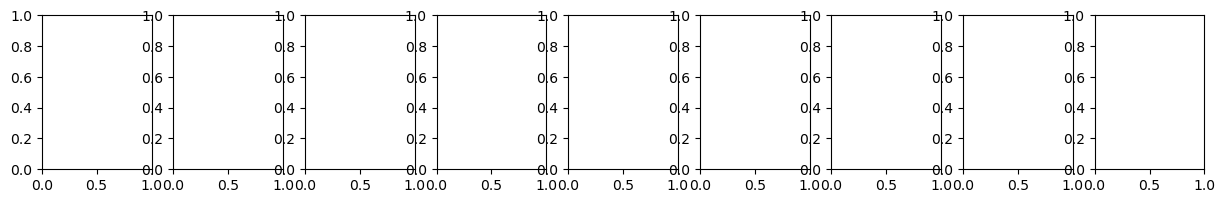

In [5]:
import matplotlib.pyplot as plt
from PIL import Image as Image, ImageEnhance
fig, ax = plt.subplots(1, num_slots + 2, figsize=(15, 2))
image = image.squeeze(0)
recon_combined = recon_combined.squeeze(0)
recons = recons.squeeze(0)
masks = masks.squeeze(0)
image = image.permute(1,2,0).cpu().numpy()
recon_combined = recon_combined.permute(1,2,0)
recon_combined = recon_combined.cpu().detach().numpy()
recons = recons.cpu().detach().numpy()
masks = masks.cpu().detach().numpy()
ax[0].imshow(image)
ax[0].set_title('Image')
ax[1].imshow(recon_combined)
ax[1].set_title('Recon.')
for i in range(7):
  picture = recons[i] * masks[i] + (1 - masks[i])
  ax[i + 2].imshow(picture)
  ax[i + 2].set_title('Slot %s' % str(i + 1))
for i in range(len(ax)):
  ax[i].grid(False)
  ax[i].axis('off')